# Algoritmo de K-means para datos en formato red (o grafo)

Cada día un gran número de empresas notan como las redes sociales contienen información importantísima sobre sus clientes, y como en general estas influyen en la toma de decisiones de una empresa. Por ejemplo, los usuarios usan redes sociales como facebook y twitter para realizar peticiones, hacer el seguimiento en la compra de productos o realizar quejas. Pero por otro lado, los negocios pueden aprovechar la información detrás de los intrincados y complejos lazos sociales. 

En una red social, tipicamente dos personas están conectadas a través de una relación social (amistad, follower, hobbies comunes, etc). De manera que es posible utilizar estos datos para segmentar a los clientes en los grupos mas significativos (que son los que arrojan directamente los datos, y no los que pre-establecemos a nuestro criterio).

En este laboratorio, veremos un ejemplo muy simple de segmentación o separación en grupos sociales pequeños, pero extrapolable a redes sociales de gran tamaño.

In [39]:
# Iniciamos importando las librerías que utilizaremos
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from IPython.display import Image
from IPython.core.display import HTML 

Para esta práctica utilizaremos un conjunto de datos muy popular en el estudio de deteción de agrupamientos o clusters en grafos, conocido como el club de Karate de Zachary. 

https://en.wikipedia.org/wiki/Zachary%27s_karate_club

Este da cuenta de la separación de una escuela de Karate en dos grupos debido a conflictos internos. La red consta de 34 miembros del club, y Wayne Zachary reporta la fisión en dos grupos, los leales con el instructor y los leales al administrador. Dos personas estan conectadas en el modelo de red, si estas continuaban interactuando fuera del club. ¿Será que un modelo de agrupamiento puede predecir la división que sufrió este grupo?

In [40]:
# Iniciamos cargando el conjunto de datos de la librería networkx
G = nx.karate_club_graph()

# y fijamos las posiciones de los nodos para graficarlas posteriormente
# usando un algoritmo especial llamado Fruchterman-Reingold 
# forzado-dirigido. 
pos = nx.spring_layout(G)

Solo con fines estéticos, utilizaremos la siguiente función, que nos permitirá representar visualmente los grupos detectados por el algoritmo k-means.

In [41]:
def draw_communities(G, membrecias, pos):
    """Dibuja los nodos con colores correspondientes a cada una 
    de las membrecias detectadas por el algoritmo de agrupamiento
    utilizado.
    ----------
    G : Grafo de Network
    membresías : lista
    pos: posiciones de los nodos
    ----------
    """
    fig, ax = plt.subplots(figsize=(16,9))
    
    # convertimos la lista de membresiasa un diccionario.
    # donde la clave / key = cluster o club, y el valor es 
    # la lista de miembros de ese cluster. 
    club_dict = defaultdict(list)
    for student, club in enumerate(membrecias):
        club_dict[club].append(student)
    
    # Normalizamos el número de miembros para elegir un color.
    norm = colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    # Finalmente procedemos a desplegar el gráfico de nuestra red. 
    plt.title("Club de Karate de Zachary")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

En este caso, los nodos de la red son el equivalente a nuestros registros, pero falta ahora definir el equivalente a los atributos de cada nodo. Para tal fin, representaremos la red a través de la llamada matriz de adyacencia. Esto nos permitirá utilizar las relaciones sociales como atributos numéricos de cada nodo. Así, entre mayor es el número de amistades comunes entre dos nodos, mas cerca estarán. 

In [42]:
# para entender mejor el concepto, veamos un ejemplo particular:
Image(url= "https://static.javatpoint.com/ds/images/sequential-representation.png")

In [43]:
def matriz_conectividad(G):
    # Inicializamos la matriz de adyacencia con ceros. 
    adj_mat = np.zeros((len(G), len(G)), dtype=int)

    for node in G:
        for neighbor in G.neighbors(node):
            adj_mat[node][neighbor] = 1
        adj_mat[node][node] = 0

    return adj_mat

In [44]:
adj_mat = matriz_conectividad(G)
adj_mat.shape

(34, 34)

In [45]:
# En este punto, ya podemos aplicar k-means. 
k_clusters = 2
results = []

# creamos el clasificador
kmc = cluster.KMeans(n_clusters=k_clusters, init='k-means++', max_iter=300, n_init=10)

In [46]:
# procedemos a aplicar k-means sobre los datos.
kmc.fit(adj_mat)
pred_y = kmc.fit_predict(adj_mat)

Podemos observar las etiquetas 

In [47]:

pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [48]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

/Users/aa/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


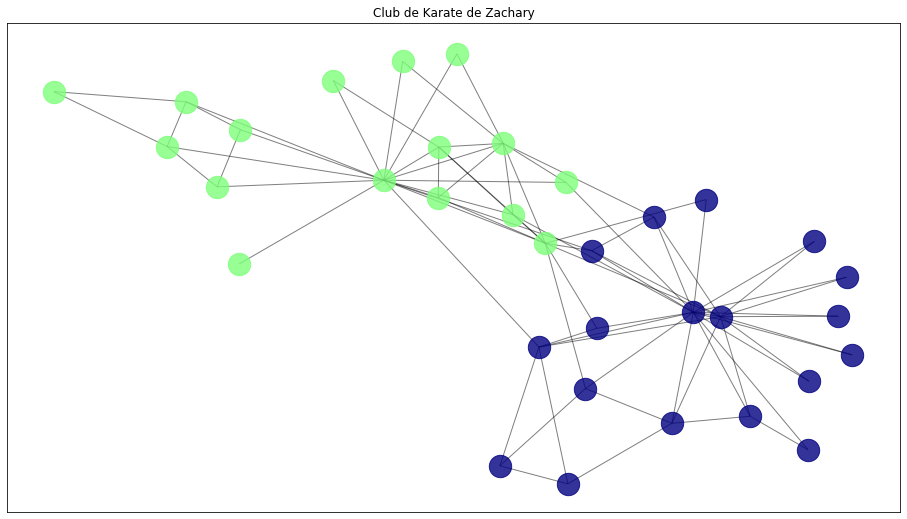

In [49]:
draw_communities(G,pred_y,pos)

Así, hemos logrado encontrar los dos grupos que en los que se separó esta pequeña red social.